- This script compares results to those calculated using the supporting .py files from Petrelli

In [1]:
import sys
import Thermobar as pt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Test dataset
out_test=pt.import_excel('GlobalDataset_Final_rev9_TrainValidation.xlsx',
                          sheet_name='Test_Thermobar_Format')

my_input=out_test['my_input']
Cpx_test=out_test['Cpxs']
Liq_test=out_test['Liqs']

In [3]:
Liq_test

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,59.90,0.70,19.00,2.960000,0.21,0.32,0.66,10.60,5.70,0.0,0.00,4.56,0.0,0.0,0.0,0.0,0
1,59.60,0.60,19.00,3.110000,0.22,0.29,0.68,10.80,5.70,0.0,0.00,3.31,0.0,0.0,0.0,0.0,1
2,61.50,0.31,19.40,2.670000,0.15,0.18,0.45,10.10,5.21,0.0,0.00,5.53,0.0,0.0,0.0,0.0,2
3,50.60,1.34,19.50,8.799200,0.12,5.89,8.59,3.85,0.67,0.0,0.24,3.00,0.0,0.0,0.0,0.0,3
4,51.50,1.41,20.00,8.731144,0.15,4.72,7.81,4.16,0.77,0.0,0.29,2.80,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,68.20,1.21,13.00,5.970000,0.00,1.22,3.80,3.66,1.83,0.0,0.00,0.00,0.0,0.0,0.0,0.0,114
115,57.40,1.04,15.30,9.870000,0.00,4.60,7.93,2.88,0.87,0.0,0.00,0.00,0.0,0.0,0.0,0.0,115
116,57.40,0.90,16.80,8.800000,0.00,4.20,8.00,2.80,1.10,0.0,0.00,1.90,0.0,0.0,0.0,0.0,116
117,50.78,1.93,16.44,9.790000,0.00,6.87,10.59,2.98,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,117


## Cpx-liq Press

In [4]:
pt.calculate_cpx_liq_press(cpx_comps=Cpx_test, liq_comps=Liq_test, equationP="P_Petrelli2020_Cpx_Liq")#.P_kbar_calc


,P_kbar_calc,Median_Trees,Std_Trees,IQR_Trees
0,24.168869,27.0,8.518301,12.000
1,24.341871,27.0,8.575561,12.000
2,24.581723,27.0,8.056293,11.925
3,22.265311,26.0,8.645662,7.750
4,22.393449,26.0,8.485995,8.000
...,...,...,...,...
114,22.293583,22.5,8.091686,8.000
115,22.407014,24.0,8.059369,8.000
116,22.983874,26.0,8.088782,10.000
117,21.609166,22.5,8.743373,7.000


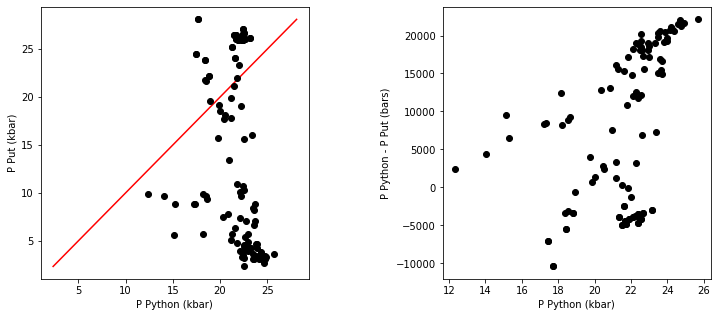

In [5]:
# Uses Temp from Talk1
P_Put=my_input['Cpx_Liq_Pressure_from_py']
P_py=pt.calculate_cpx_liq_press(cpx_comps=Cpx_test, liq_comps=Liq_test, equationP="P_Petrelli2020_Cpx_Liq").P_kbar_calc
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(P_Put), np.max(P_Put)], [np.min(P_Put), np.max(P_Put)], '-r')
ax1.plot(P_py, P_Put, 'ok')
ax1.set_xlabel('P Python (kbar)')
ax1.set_ylabel('P Put (kbar)')
ax2.plot(P_py, 1000*(P_py-P_Put), 'ok')
ax2.set_ylabel('P Python - P Put (bars)')
ax2.set_xlabel('P Python (kbar)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Cpx-Liq temp

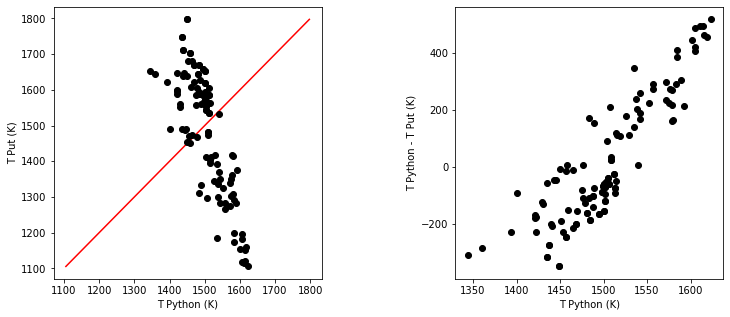

In [6]:
T_Put=my_input['Cpx_Liq_Temp_from_py'] 
T_py=pt.calculate_cpx_liq_temp(cpx_comps=Cpx_test, liq_comps=Liq_test, equationT="T_Petrelli2020_Cpx_Liq").T_K_calc
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(T_Put), np.max(T_Put)], [np.min(T_Put), np.max(T_Put)], '-r')
ax1.plot(T_py, T_Put, 'ok')
ax1.set_xlabel('T Python (K)')
ax1.set_ylabel('T Put (K)')
ax2.plot(T_py, T_py-T_Put, 'ok')
ax2.set_ylabel('T Python - T Put (K)')
ax2.set_xlabel('T Python (K)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)


## Cpx-only Pressure

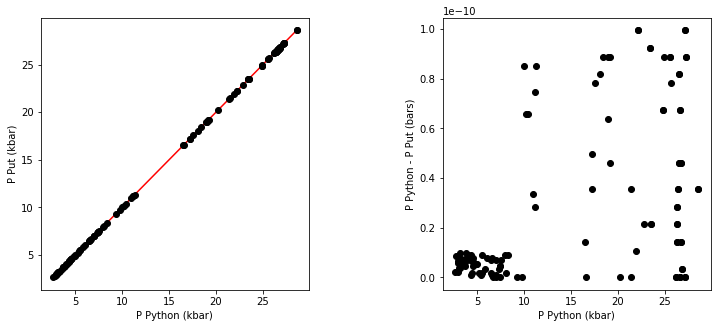

In [7]:
# Uses Temp from Talk1
P_Put=my_input['Cpx_only_Pressure_from_py']
P_py=pt.calculate_cpx_only_press(cpx_comps=Cpx_test,  equationP="P_Petrelli2020_Cpx_only").P_kbar_calc
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(P_Put), np.max(P_Put)], [np.min(P_Put), np.max(P_Put)], '-r')
ax1.plot(P_py, P_Put, 'ok')
ax1.set_xlabel('P Python (kbar)')
ax1.set_ylabel('P Put (kbar)')
ax2.plot(P_py, 1000*(P_py-P_Put), 'ok')
ax2.set_ylabel('P Python - P Put (bars)')
ax2.set_xlabel('P Python (kbar)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

# Cpx-only Temperature